In [39]:

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("OpenCV version:", cv.__version__)
print("Python version:", os.sys.version)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)

TensorFlow version: 2.16.1
NumPy version: 1.26.4
OpenCV version: 4.9.0
Python version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]
Pandas version: 2.2.1
Matplotlib version: 3.8.3
Scikit-learn version: 1.4.1.post1


In [41]:
# Load the data
def load_image(image_path):
    try:
        image = cv.imread(image_path)
        if image is None:
            raise FileNotFoundError("Failed to load image. Please check the file path.")
        return image
    except Exception as e:
        print("Error:", e)
        return None

In [42]:

data_limit_per_dir = 1100
data = []
label = []
category = []

# Set your path here
path = "archive/dataset/"

for dir in os.listdir(path=path):
    dir_count = 0
    category.append(dir)
    for file in os.listdir(path=path + dir):
        if dir_count >= data_limit_per_dir:
            break
        image = load_image(path + dir + "/" + file)
        if image is not None:
            image = cv.resize(image, (256, 256))
            image = image.astype(np.float32) / 255.0
            data.append(image)
            label.append(dir_count)
            dir_count += 1

In [43]:
print(data[1][128][128].dtype)

float32


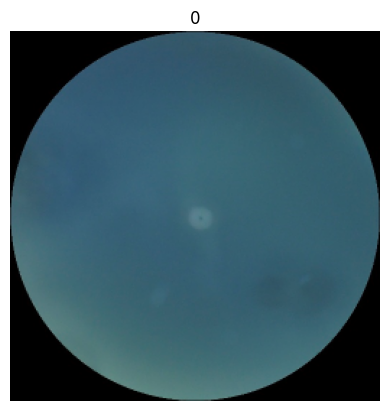

In [44]:
for i in range(1):
    plt.imshow(data[i])
    plt.title(label[i])
    plt.axis("off")
    plt.show()

In [45]:
# Convert the data and label to NumPy array
data = np.array(data)
label = np.array(label)

# Randomizing and Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=120)


In [48]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained VGG-19 model without the top (fully connected) layers
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the weights of the VGG model
for layer in vgg_model.layers:
    layer.trainable = False

# Add a new output layer for binary classification
x = Flatten()(vgg_model.output)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model with modified output layer
model = Model(inputs=vgg_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,057,153 (76.51 MB)

 Trainable params: 32,769 (128.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [49]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

MemoryError: Unable to allocate 4.40 GiB for an array with shape (6013, 256, 256, 3) and data type float32